# Code for plots

## Plot of the error by varying the input dimension

In [151]:
import numpy as np
from matplotlib import pyplot as plt
import utils_MNIST
import saving_utils
import torch
import torch.nn as nn


In [4]:
depth=5
W=512
input_dims=[5,10,20,40,100,784,30]
wd=1e-4

In [5]:
x_array=np.load(f'./arrays/sizes_{depth}_layer_{W}_inputdim_{input_dims[0]}.npy')
y_arrays=[]
for i in range(len(input_dims)):
    #y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dims[i]}_wd_{wd}.npy'))
    y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dims[i]}.npy'))
    

Text(0, 0.5, '$\\Delta error$')

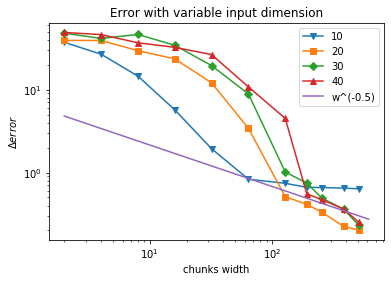

In [6]:
fig = plt.figure()
ax = plt.gca()
#ax.plot(x_array,y_arrays[0],marker="o",label="5")
ax.plot(x_array,y_arrays[1],marker="v",label="10")
ax.plot(x_array,y_arrays[2],marker="s",label="20")
ax.plot(x_array,y_arrays[6],marker="D",label="30")
ax.plot(x_array,y_arrays[3],marker="^",label="40")
#ax.plot(x_array,y_arrays[4],marker="p",label="100")
#ax.plot(x_array,y_arrays[5],marker="D",label="784")

x = np.linspace(2,1.2*W,1000)
a=y_arrays[3][-1]/(W**(-0.5))
y=1.2*a*x**(-0.5)
ax.plot(x,y,label='w^(-0.5)')
ax.set_title('Error with variable input dimension')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')

## Plot the error by varying the depth

In [2]:
x_arrays=[]
y_arrays=[]
wd=1e-4
#x_arrays.append(np.load(f'./arrays/sizes_{2}_layer_{2048}_inputdim_{784}.npy')) 
x_arrays.append(np.load(f'./arrays/sizes_{3}_layer_{512}_inputdim_{784}_wd_{wd}.npy')) 
x_arrays.append(np.load(f'./arrays/sizes_{4}_layer_{512}_inputdim_{784}_wd_{wd}.npy')) 
x_arrays.append(np.load(f'./arrays/sizes_{5}_layer_{512}_inputdim_{784}_wd_{wd}.npy')) 
y_arrays.append(np.load(f'./arrays/error_{3}_layer_{512}_inputdim_{784}_wd_{wd}.npy')) 
y_arrays.append(np.load(f'./arrays/error_{4}_layer_{512}_inputdim_{784}_wd_{wd}.npy')) 
y_arrays.append(np.load(f'./arrays/error_{5}_layer_{512}_inputdim_{784}_wd_{wd}.npy')) 


Text(0, 0.5, '$\\Delta error$')

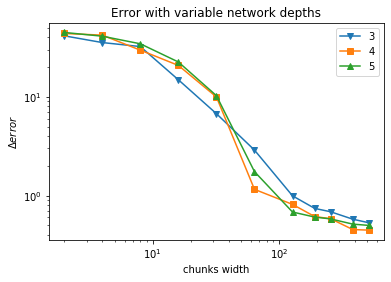

In [3]:
fig = plt.figure()
ax = plt.gca()
#ax.plot(x_array,y_arrays[0],marker="o",label="2")
ax.plot(x_arrays[0],y_arrays[0],marker="v",label="3")
ax.plot(x_arrays[1],y_arrays[1],marker="s",label="4")
ax.plot(x_arrays[2],y_arrays[2],marker="^",label="5")
ax.set_title('Error with variable network depths')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')

## Plot the error for 2 layer NN, with variable weight decay

In [3]:
depth=2
W=2048
input_dim=40

wds=[1e-2,1e-3,1e-4,1e-5,1e-6]
x_arrays=[]
y_arrays=[]
for i in range(len(wds)):
    x_arrays.append(np.load(f'./old_folders/arrays/sizes_{depth}_layer_{W}_inputdim_{input_dim}_wd_{wds[i]}.npy'))
    y_arrays.append(np.load(f'./old/folders/arrays/error_{depth}_layer_{W}_inputdim_{input_dim}_wd_{wds[i]}.npy'))


FileNotFoundError: [Errno 2] No such file or directory: './old_folders/arrays/sizes_2_layer_2048_inputdim_40_wd_0.01.npy'

Text(0, 0.5, '$\\Delta error$')

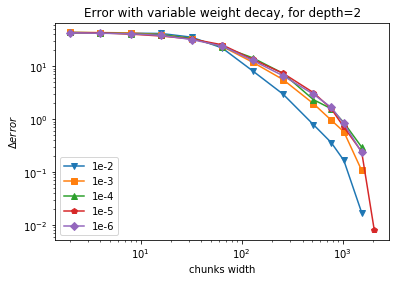

In [11]:
fig = plt.figure()
ax = plt.gca()
ax.plot(x_arrays[0],y_arrays[0],marker="v",label="1e-2")
ax.plot(x_arrays[1],y_arrays[1],marker="s",label="1e-3")
ax.plot(x_arrays[2],y_arrays[2],marker="^",label="1e-4")
ax.plot(x_arrays[3],y_arrays[3],marker="p",label="1e-5")
ax.plot(x_arrays[4],y_arrays[4],marker="D",label="1e-6")
ax.set_title('Error with variable weight decay, for depth=2')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')

## Plot for variable width, for FCN3

In [20]:
depth=3
input_dim=784
lr=1e-3
Ws=[64,128,256,512,1024]
x_arrays=[]
y_arrays=[]
for i in range(len(Ws)):
    x_arrays.append(np.load(f'./arrays/sizes_{depth}_layer_{Ws[i]}_inputdim_{input_dim}_lr_{lr}_wd_{1e-3}_Adam.npy'))
    y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{Ws[i]}_inputdim_{input_dim}_lr_{lr}_wd_{1e-3}_Adam.npy'))

Text(0, 0.5, '$\\Delta error$')

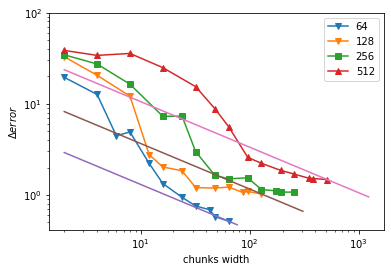

In [25]:
fig = plt.figure()
ax = plt.gca()
ax.plot(x_arrays[0],y_arrays[0],marker="v",label="64")
ax.plot(x_arrays[1],y_arrays[1],marker="v",label="128")
ax.plot(x_arrays[2],y_arrays[2],marker="s",label="256")
ax.plot(x_arrays[3],y_arrays[3],marker="^",label="512")
#ax.plot(x_arrays[4],y_arrays[4],marker="p",label="1024")
#ax.plot(x_arrays[4],y_arrays[4],marker="D",label="2048")


x = np.linspace(2,1.2*x_arrays[0][-1],1000)
ax.set_ylim([0.8*y_arrays[0][-1],100])
a=y_arrays[0][-1]/(x_arrays[0][-1]**(-0.5))
y=a*x**(-0.5)
ax.plot(x,y)


x = np.linspace(2,1.2*x_arrays[2][-1],1000)
ax.set_ylim([0.8*y_arrays[0][-1],100])
a=y_arrays[1][-1]/(x_arrays[1][-1]**(-0.5))
y=a*x**(-0.5)
ax.plot(x,y)


'''x = np.linspace(2,1.2*x_arrays[4][-1],1000)
ax.set_ylim([0.8*y_arrays[0][-1],100])
a=y_arrays[2][-1]/(x_arrays[2][-1]**(-0.5))
y=a*x**(-0.5)
ax.plot(x,y)'''

x = np.linspace(2,1.2*x_arrays[4][-1],1000)
ax.set_ylim([0.8*y_arrays[0][-1],100])
a=y_arrays[3][-1]/(x_arrays[3][-1]**(-0.5))
y=a*x**(-0.5)
ax.plot(x,y)


#ax.set_title('Error with variable width, for depth=3')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')


## Testing the trend for the full network

In [200]:
import torchvision.transforms as transforms
depth=3
sample_size=10000
weight_decays=[1e-4,1e-3]
input_dim=784
signal_noise_ratio=1.
lr=1e-3
widths=[64,128,256,512,1024]
teacher_width=8
number_nets=5
square_edge=2
n_epochs=500
dataset='pMNIST'
optimizer='Adam'
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)])
trainset,testset=saving_utils.dataset_loader('train',dataset, transform, input_dim, sample_size,signal_noise_ratio,teacher_width, square_edge)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset),
                                         shuffle=False, num_workers=2)
y_arrays=[]
errors_of_arrays=[]
for element in weight_decays:
    y_array=[]
    for W in widths:
        if dataset=='XOR':
            y_array.append(float(np.load(f'./deltaerrors/ensemble_deltaerror_{dataset}_{depth}_layer_{W}_inputdim_{input_dim}_lr_{lr}_wd_{element}_ratio_{signal_noise_ratio}.npy')))
        if dataset=='pMNIST':
            y_array.append(float(np.load(f'./deltaerrors/ensemble_deltaerror_{dataset}_{depth}_layer_{W}_inputdim_{input_dim}_lr_{lr}_wd_{element}_{optimizer}.npy')))
        if dataset=='generalized_XOR':
            y_array.append(float(np.load(f'./deltaerrors/ensemble_deltaerror_{dataset}_{depth}_layer_{W}_inputdim_{input_dim}_lr_{lr}_wd_{element}_edge_{3}_ratio_{signal_noise_ratio}.npy')))
        if dataset=='teacher':
            y_array.append(float(np.load(f'./deltaerrors/ensemble_deltaerror_{dataset}_{depth}_layer_{W}_inputdim_{input_dim}_lr_{lr}_wd_{element}_teacherwidth_{teacher_width}_ratio_{signal_noise_ratio}.npy')))
    y_arrays.append(y_array)
    errors=[]
    for W in widths: 
        accuracies=[]
        big_net = utils_MNIST.fully_connected_new(W, depth=depth, input_size=input_dim, output_size=1,
                                dropout=False, batch_norm=False, orthog_init=False)
        if dataset=='pMNIST':
            total_outputs=0
            outputs_array=[]
            for i in range(number_nets):
                PATH=saving_utils.load_weights(dataset,depth,W,i,learning_rate,weight_decay,input_dim,optimizer,n_epochs,signal_noise_ratio,teacher_width,square_edge)
                weights_dict = torch.load(PATH)
                big_net.load_state_dict(weights_dict)
                acc,_,outputs=utils_MNIST.evaluate_on_dataset(dataset, testloader,big_net, nn.BCEWithLogitsLoss())
                outputs_array.append(torch.sigmoid(outputs))
                accuracies.append(acc)
            total_outputs+=torch.sigmoid(outputs)
            total_outputs=total_outputs/number_nets
            #print(total_outputs)
            smaller_ensemble_avgs=[]
            for i in range(number_nets):
                total_outputs_1=(total_outputs-outputs_array[i]/float(number_nets))*number_nets/(number_nets-1)
                total=0
                correct1=0
                with torch.no_grad():
                    for data in testloader:
                        images, labels = data
                        # calculate outputs by running images through the network
                        # the class with the highest energy is what we choose as prediction
                        predicted1 = torch.round(total_outputs_1)
                        #predicted2=torch.round(total_maj_outputs_1)
                        total += labels.size(0)
                        correct1 += (predicted1 == labels).sum().item()
                        #correct2 += (predicted2 == labels).sum().item()
                        #print(total_outputs_1.to(torch.float32))
                        #test_loss += criterion2(total_outputs_1.to(torch.float32), labels.to(torch.float32))
                #accuracy_inf2=100*correct2/total
                accuracy_inf1=100*correct1/total
                smaller_ensemble_avgs.append(accuracy_inf1)
            '''big_ensemble_avg=float(np.load(f'./testerrors/ensemble_testerror_{dataset}_{depth}_layer_{W}_inputdim_{input_dim}_lr_{lr}_wd_{element}_{optimizer}.npy'))
            print(big_ensemble_avg)
            error=0
            for i in range(number_nets):
                #print((1-big_ensemble_avg)*100)
                error+=(big_ensemble_avg-accuracies[i])**2
                #error+=(big_ensemble_avg-smaller_ensemble_avgs[i])**2
            error=error**(1/2)
            error=error/(number_nets-1)
            errors.append(error)'''
            error=np.std(accuracies)
            errors.append(error)
    errors_of_arrays.append(errors)

In [201]:
print(errors)

[0.12967652061957724, 0.16788091017146978, 0.2218648237102926, 0.2651339284210905, 0.175453697595688]


Text(0, 0.5, '$\\Delta error$')

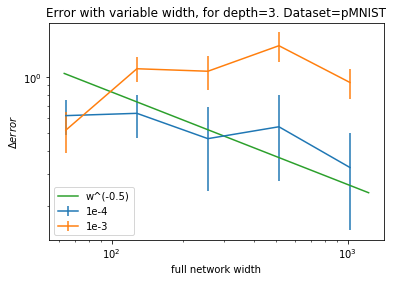

In [203]:
fig = plt.figure()
ax = plt.gca()
ax.errorbar(widths,y_arrays[0],errors_of_arrays[0],label="1e-4")
ax.errorbar(widths,y_arrays[1],errors_of_arrays[1],label="1e-3")
#ax.plot(widths,y_arrays[1],marker="v",label="5e-4")
#ax.plot(widths,y_arrays[2],marker="v",label="1e-3")
#ax.plot(widths,y_arrays[3],marker="v",label="5e-3")
#ax.plot(widths,y_arrays[4],marker="v",label="5e-3")
#ax.plot(widths,y_arrays[5],marker="v",label="1e-2")

x = np.linspace(widths[0]-1,1.2*W,1000)
a=y_arrays[0][-1]/(widths[-1]**(-0.5))
y=0.8*a*x**(-0.5)
ax.plot(x,y,label='w^(-0.5)')

ax.set_title(f'Error with variable width, for depth={depth}. Dataset={dataset}')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('full network width')
plt.ylabel('$\Delta error$')

In [32]:
depth=2
weight_decays=[1e-4]
input_dim=784
signal_noise_ratio=1.
lr=1e-3
widths=[64,128,256,512,1024]
averages=[]
teacher_width=8
dataset='pMNIST'
optimizer_choice='Adam'
for weight_decay in weight_decays:
    if dataset == 'pMNIST':
        accuracy_inf=np.load(f'./testerrors/ensemble_testerror_{dataset}_{depth}_layer_{widths[-1]}_inputdim_{input_dim}_lr_{lr}_wd_{weight_decay}'
                             f'_{optimizer_choice}.npy')
    if dataset == 'XOR':
        accuracy_inf=np.load(f'./testerrors/ensemble_testerror_{dataset}_{depth}_layer_{widths[-1]}_inputdim_'
                             f'{input_dim}_lr_{lr}_wd_{weight_decay}_ratio_{signal_noise_ratio}_{optimizer_choice}.npy')
    if dataset == 'teacher':
        accuracy_inf=np.load(f'./testerrors/ensemble_testerror_{dataset}_{depth}_layer_{widths[-1]}_inputdim_{input_dim}_lr_'
                             f'{lr}_wd_{weight_decay}_teacherwidth_{teacher_width}_ratio_{signal_noise_ratio}_{optimizer_choice}.npy')
    if dataset=='generalized_XOR':
        accuracy_inf = np.load(f'./testerrors/ensemble_testerror_{dataset}_{depth}_layer_{widths[-1]}_inputdim_{input_dim}_lr_'
                               f'{lr}_wd_{weight_decay}_edge_{square_edge}_ratio_{signal_noise_ratio}_{optimizer_choice}.npy')
        
    for width in widths:
        if dataset == 'pMNIST':
            averages.append(np.load(f'./testerrors/average_testerror_{dataset}_{depth}_layer_{width}_inputdim_{input_dim}_lr_{lr}_wd_{weight_decay}'
                             f'_{optimizer_choice}.npy'))
        if dataset == 'XOR':
            averages.append(np.load(f'./testerrors/ensemble_testerror_{dataset}_{depth}_layer_{width}_inputdim_'
                             f'{input_dim}_lr_{lr}_wd_{weight_decay}_ratio_{signal_noise_ratio}_{optimizer_choice}.npy'))
        if dataset == 'teacher':
            averages.append(np.load(f'./testerrors/ensemble_testerror_{dataset}_{depth}_layer_{width}_inputdim_{input_dim}_lr_'
                             f'{lr}_wd_{weight_decay}_teacherwidth_{teacher_width}_ratio_{signal_noise_ratio}_{optimizer_choice}.npy'))
        if dataset=='generalized_XOR':
            averages.append(np.load(f'./testerrors/ensemble_testerror_{dataset}_{depth}_layer_{width}_inputdim_{input_dim}_lr_'
                               f'{lr}_wd_{weight_decay}_edge_{square_edge}_ratio_{signal_noise_ratio}_{optimizer_choice}.npy'))

[array(97.284), array(97.57), array(97.49), array(97.488), array(97.24)]
[0.506 0.22  0.3   0.302 0.55 ]


Text(0, 0.5, '$\\Delta error$')

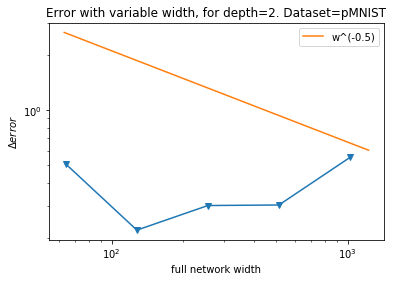

In [33]:
deltaerrors=accuracy_inf-averages
print(averages)
print(deltaerrors)

fig = plt.figure()
ax = plt.gca()
ax.plot(widths,deltaerrors,marker="v")


x = np.linspace(widths[0]-1,1.2*widths[-1],1000)
a=deltaerrors[-1]/(widths[-1]**(-0.5))
y=1.2*a*x**(-0.5)
ax.plot(x,y,label='w^(-0.5)')

ax.set_title(f'Error with variable width, for depth={depth}. Dataset={dataset}')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('full network width')
plt.ylabel('$\Delta error$')

## Average test errors

In [30]:
dataset='pMNIST'
depth=2
width=1024
input_dim=784
lr=1e-3
weight_decay=1e-3
optimizer_choice='Adam'


print(np.load(f'./testerrors/average_testerror_{dataset}_{depth}_layer_{width}_inputdim_{input_dim}_lr_{lr}_wd_{weight_decay}'
                             f'_{optimizer_choice}.npy'))

97.224


## Adam-SGD Comparison


In [2]:
depth=5
W=512
dataset='pMNIST'
input_dim=784
y_arrays=[]
x_array=np.load(f'./arrays/sizes_{depth}_layer_{W}_inputdim_{input_dim}_lr_0.001_wd_0.001_Adam.npy')
y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dim}_lr_0.001_wd_0.001_Adam.npy'))
y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dim}_lr_0.001_wd_0.001_SGD.npy'))

Text(0, 0.5, '$\\Delta error$')

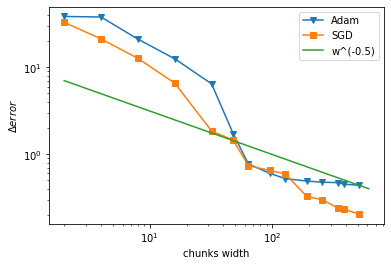

In [3]:
fig = plt.figure()
ax = plt.gca()

ax.plot(x_array,y_arrays[0],marker="v",label="Adam")
ax.plot(x_array,y_arrays[1],marker="s",label="SGD")

#ax.plot(x_array,y_arrays[5],marker="D",label="784")

x = np.linspace(2,1.2*W,1000)
a=y_arrays[0][-1]/(W**(-0.5))
y=1*a*x**(-0.5)
ax.plot(x,y,label='w^(-0.5)')
#ax.set_title('Error with variable input dimension')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')

## Plot by changing input dimension (again)

In [16]:
depth=5
W=512
input_dims=[10,20,30,40,100,784]
wd=1e-4
lr=1e-3

In [17]:
x_array=np.load(f'./arrays/sizes_{depth}_layer_{W}_inputdim_{input_dims[0]}_lr_{lr}_wd_{wd}_Adam.npy')
y_arrays=[]
for i in range(len(input_dims)):
    #y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dims[i]}_wd_{wd}.npy'))
    y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dims[i]}_lr_{lr}_wd_{wd}_Adam.npy'))

Text(0, 0.5, '$\\Delta error$')

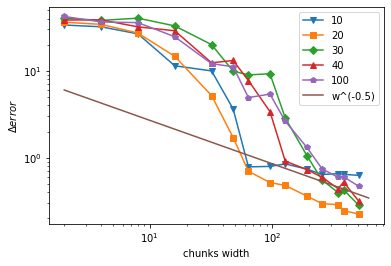

In [19]:
fig = plt.figure()
ax = plt.gca()

ax.plot(x_array,y_arrays[0],marker="v",label="10")
ax.plot(x_array,y_arrays[1],marker="s",label="20")
ax.plot(x_array,y_arrays[2],marker="D",label="30")
ax.plot(x_array,y_arrays[3],marker="^",label="40")
ax.plot(x_array,y_arrays[4],marker="p",label="100")
#ax.plot(x_array,y_arrays[5],marker="D",label="784")

x = np.linspace(2,1.2*W,1000)
a=y_arrays[3][-1]/(W**(-0.5))
y=1.2*a*x**(-0.5)
ax.plot(x,y,label='w^(-0.5)')
#ax.set_title('Error with variable input dimension')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')

## Variable Depth (again)

In [21]:
optimizer_choice='Adam'
W=512
depths=[3,4,5]
weight_decay=1e-3
learning_rate=1e-3
input_dim=784

In [22]:
x_array=np.load(f'./arrays/sizes_{depth}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_{optimizer_choice}.npy')
y_arrays=[]
for i in range(len(depths)):
    #y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dims[i]}_wd_{wd}.npy'))
    y_arrays.append(np.load(f'./arrays/error_{depths[i]}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_{optimizer_choice}.npy'))

Text(0, 0.5, '$\\Delta error$')

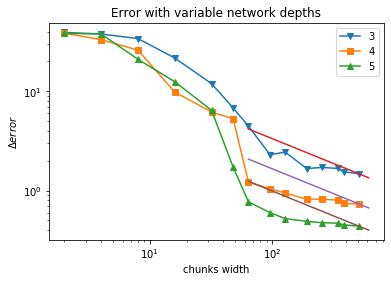

In [29]:
fig = plt.figure()
ax = plt.gca()
#ax.plot(x_array,y_arrays[0],marker="o",label="2")
ax.plot(x_array,y_arrays[0],marker="v",label="3")
ax.plot(x_array,y_arrays[1],marker="s",label="4")
ax.plot(x_array,y_arrays[2],marker="^",label="5")
x = np.linspace(64,1.2*x_array[-1],1000)
a1=y_arrays[0][-1]/(x_array[-1]**(-0.5))
y1=a1*x**(-0.5)
a2=y_arrays[1][-1]/(x_array[-1]**(-0.5))
y2=a2*x**(-0.5)
a3=y_arrays[2][-1]/(x_array[-1]**(-0.5))
y3=a3*x**(-0.5)
ax.plot(x,y1)
ax.plot(x,y2)
ax.plot(x,y3)
ax.set_title('Error with variable network depths')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')

## Dynamics

In [1]:
optimizer_choice='SGD'
W=512
depth=5
weight_decay=1e-3
learning_rate=1e-3
input_dim=784
epochs=[5,50,100,200,500]


In [4]:
x_array=np.load(f'./arrays/sizes_{depth}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_{optimizer_choice}.npy')
y_arrays=[]
for epoch in epochs:
    #y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dims[i]}_wd_{wd}.npy'))
    if epoch!=500:
        y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_{optimizer_choice}_{epoch}.npy'))
    else:
        y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_{optimizer_choice}.npy'))

Text(0, 0.5, '$\\Delta error$')

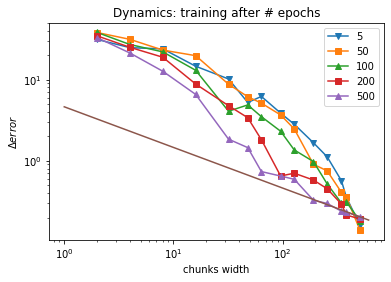

In [6]:
fig = plt.figure()
ax = plt.gca()
#ax.plot(x_array,y_arrays[0],marker="o",label="2")
ax.plot(x_array,y_arrays[0],marker="v",label="5")
ax.plot(x_array,y_arrays[1],marker="s",label="50")
ax.plot(x_array,y_arrays[2],marker="^",label="100")
ax.plot(x_array,y_arrays[3],marker="s",label="200")
ax.plot(x_array,y_arrays[4],marker="^",label="500")
x = np.linspace(1,1.2*x_array[-1],1000)
a1=y_arrays[4][-1]/(x_array[-1]**(-0.5))
y1=a1*x**(-0.5)

ax.plot(x,y1)

ax.set_title('Dynamics: training after # epochs')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')

## Find $\omega_{c}^{*}$

In [3]:
optimizer_choice='Adam'
W=512
depths=[3,4,5]
weight_decay=1e-3
learning_rate=1e-3
input_dim=784

In [4]:
x_array=np.load(f'./arrays/sizes_{5}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_{optimizer_choice}.npy')
y_arrays=[]
errors=[]
for i in range(len(depths)):
    #y_arrays.append(np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dims[i]}_wd_{wd}.npy'))
    y_arrays.append(np.load(f'./arrays/error_{depths[i]}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_{optimizer_choice}.npy'))
    errors.append(np.load(f'./arrays/error_on_error_{depths[i]}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_{optimizer_choice}.npy'))

Text(0, 0.5, '$\\Delta error$')

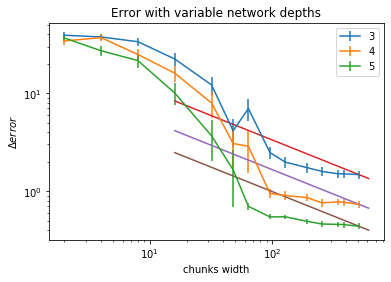

In [7]:
fig = plt.figure()
ax = plt.gca()
#ax.plot(x_array,y_arrays[0],marker="o",label="2")
ax.errorbar(x_array,y_arrays[0],errors[0],label="3")
ax.errorbar(x_array,y_arrays[1],errors[1],label="4")
ax.errorbar(x_array,y_arrays[2],errors[2],label="5")
x = np.linspace(16,1.2*x_array[-1],1000)
a1=y_arrays[0][-1]/(x_array[-1]**(-0.5))
y1=a1*x**(-0.5)
a2=y_arrays[1][-1]/(x_array[-1]**(-0.5))
y2=a2*x**(-0.5)
a3=y_arrays[2][-1]/(x_array[-1]**(-0.5))
y3=a3*x**(-0.5)
ax.plot(x,y1)
ax.plot(x,y2)
ax.plot(x,y3)
ax.set_title('Error with variable network depths')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')

In [222]:
optimizer_choice='Adam'
W=128
depth=3
weight_decay=1e-3
learning_rate=1e-3
input_dim=784
n_epochs=500
if n_epochs!=500:
    x_array=np.load(f'./arrays/sizes_{depth}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_'
                      f'{optimizer_choice}_{n_epochs}.npy')
    y_array=np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_'
                      f'{optimizer_choice}_{n_epochs}.npy')
    error=np.load(f'./arrays/error_on_error_{depth}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_'
                      f'{optimizer_choice}_{n_epochs}.npy')
else:
    x_array=np.load(f'./arrays/sizes_{depth}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_{optimizer_choice}.npy')
    y_array=np.load(f'./arrays/error_{depth}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_{optimizer_choice}.npy')
    error=np.load(f'./arrays/error_on_error_{depth}_layer_{W}_inputdim_{input_dim}_lr_{learning_rate}_wd_{weight_decay}_{optimizer_choice}.npy')


In [217]:
from scipy.optimize import curve_fit
def power_law_to_fit(x,a,b):
    return a*x**(b)

In [218]:
def chisq(obs, exp, error):
    return (np.sum((obs - exp) ** 2 / (error ** 2)))/(len(obs)-2)

In [219]:
for number_points in range(3,len(x_array)-3):
    popt,_=curve_fit(power_law_to_fit,x_array[-number_points:],y_array[-number_points:])
    #print(popt)
    A1=power_law_to_fit(np.array(x_array),popt[0],popt[1])[-number_points:]
    A2=np.array(y_array)[-number_points:]
    err_bars = np.array(error)[-number_points:]
    #print(chisq(A1, A2, err_bars))
    critical_size=x_array[-3]
    if chisq(A1, A2, err_bars) >1:
        #print(x_array[-number_points])
        critical_size=x_array[-number_points]
print(critical_size)

16


No handles with labels found to put in legend.


Text(0, 0.5, '$\\Delta error$')

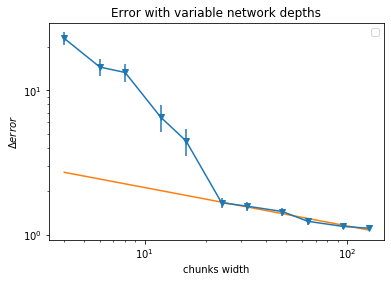

In [223]:
fig = plt.figure()
ax = plt.gca()
#ax.plot(x_array,y_arrays[0],marker="o",label="2")
ax.errorbar(x_array,y_array,error,marker='v')

popt,pcov=curve_fit(power_law_to_fit,x_array[-number_points+1:],y_array[-number_points+1:])
ax.plot(x_array,power_law_to_fit(x_array,popt[0],popt[1]))
ax.set_title('Error with variable network depths')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
plt.xlabel('chunks width')
plt.ylabel('$\Delta error$')

In [129]:
print(popt)

[ 2.47577759 -0.41116633]


In [104]:
print(pcov)

[[ 0.28731512 -0.01371831]
 [-0.01371831  0.0006702 ]]


In [130]:
print(error)

[2.60932147 3.70817223 1.74217479 0.82841035 0.70517046 0.12478139
 0.10067061 0.073456   0.02453337 0.02944969 0.03354917 0.03465211
 0.04574603 0.0377702  0.04658115]
